<div style="text-align:center">
    <h1 style="color:blue;text-shadow: 2px 2px #E0E0E0">Projeto de Análise MyAnimeList</h1>
    <a href="https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/" target="_blank">MyAnimeList Anime & Manga Dataset (July 2025)</a><br>
    <a href="https://github.com/Gregory280">Autor: Gregory280</a>
</div>

<p style="text-align:center">
    <b>Notebook 2 de 3<br>
    Análise Exploratória</b>
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fonte de Dados
</h3>
<p>
    Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.<br>
    Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.<br>
    Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 28.635 entradas de animes.
</p>

<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Pacotes Python
</h3>

In [1]:
!pip install -q -U watermark

In [2]:
!pip install -q missingno

In [3]:
# Pacotes utilizados
import datetime
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [4]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



<h3 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Análise Exploratória
</h3>
<p>
    Esta etapa do processo ajuda a compreender como os dados estão organizados. O ideal seria aplica-lá antes e depois da etapa de pré-processamento, mas a caráter ilustratório irei aplicar uma vez e apenas nas principais variáveis de interesse.
</p>

In [5]:
# Carregamos a variável contendo o dataset tratado do notebook anterior
%store -r df_limpo

In [6]:
# Amostra
df_limpo.sample(3)

,id,link,title_name,score,scored_by,ranked,popularity,members,favorited,japanese_name,...,studios,source,genres,themes,demographic,duration,age_rating,scored_by_faixa,members_faixa,start_year
2895,2488,https://myanimelist.net/anime/2488/Mei_to_Kone...,Mei to Koneko Bus,7.30,8813,2897.0,5000,22729,24,めいとこねこバス,...,[Studio Ghibli],Original,"[Adventure, Fantasy]",[],Unknown,14 min.,G - All Ages,Até 10.000,20.000-50.000,2002.0
1465,35503,https://myanimelist.net/anime/35503/Shoujo☆Kag...,Shoujo☆Kageki Revue Starlight,7.65,33605,1467.0,2374,94227,1586,少女☆歌劇 レヴュースタァライト,...,[Kinema Citrus],Original,[Drama],"[Music, Performing Arts, School]",Unknown,24 min. per ep.,PG-13 - Teens 13 or older,Até 50.000,50.000-100.000,2018.0
5777,37525,https://myanimelist.net/anime/37525/Babylon,Babylon,6.74,57738,5769.0,1572,165588,716,バビロン,...,[Revoroot],Novel,"[Mystery, Suspense]","[Adult Cast, Detective, Psychological]",Unknown,24 min. per ep.,R - 17+ (violence & profanity),Até 75.000,100.000-500.000,2019.0


<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Estatísticas Gerais e Percentis
</h4>

In [7]:
# Descrevendo os dados numéricos
df_limpo[['score', 'scored_by', 'members']].describe()

,score,scored_by,members
count,18673.000000,2.863500e+04,2.863500e+04
mean,6.397852,1.954308e+04,3.875113e+04
std,0.890475,9.924774e+04,1.668734e+05
min,1.890000,0.000000e+00,1.800000e+01
25%,5.780000,0.000000e+00,2.350000e+02
50%,6.370000,3.080000e+02,1.082000e+03
75%,7.030000,3.294500e+03,9.187500e+03
max,9.300000,2.956009e+06,4.194641e+06


<p>
    Com podemos ter uma visão geral de certas informações como por exemplo o anime com a menor nota (sendo 1.89) e a maior nota (9.3) da plataforma e a média de notas dos animes é 6.3.
</p>

In [8]:
# Retorna o titulo e nota dos 10 animes mais maiores notas
df_limpo.nlargest(10, 'score')[['title_name', 'score']]

,title_name,score
0,Sousou no Frieren,9.30
1,Fullmetal Alchemist: Brotherhood,9.10
2,Steins;Gate,9.07
3,Shingeki no Kyojin Season 3 Part 2,9.05
4,Gintama: The Final,9.05
5,Gintama°,9.05
6,One Piece Fan Letter,9.04
7,Hunter x Hunter (2011),9.03
8,Ginga Eiyuu Densetsu,9.02
9,Gintama',9.02


<p>
    Estes são os 10 animes com <b>maior</b> nota do MyAnimeList.
</p>

<p>
    
</p>

In [9]:
# Retorna titulo e membros dos 10 animes com maiores membros
df_limpo.nlargest(10, 'members')[['title_name', 'members']]

,title_name,members
111,Shingeki no Kyojin,4194641
91,Death Note,4137032
1,Fullmetal Alchemist: Brotherhood,3547700
154,One Punch Man,3405752
186,Kimetsu no Yaiba,3282796
3351,Sword Art Online,3214257
986,Boku no Hero Academia,3190059
7,Hunter x Hunter (2011),3050800
675,Naruto,3012152
1110,Tokyo Ghoul,2964826


<p>
    O anime com mais membros dentro da plataforma até julho de 2025 era <b>Shingeki no Kyojin</b> com 4.194.641 de membros.
</p>

In [10]:
# Retorna titulo e scored_by dos 10 animes que mais foram avaliados
df_limpo.nlargest(10, 'scored_by')[['title_name', 'scored_by']]

,title_name,scored_by
111,Shingeki no Kyojin,2956009
91,Death Note,2896806
154,One Punch Man,2349475
186,Kimetsu no Yaiba,2253816
1,Fullmetal Alchemist: Brotherhood,2232236
3351,Sword Art Online,2229664
986,Boku no Hero Academia,2167207
675,Naruto,2073456
30,Kimi no Na wa.,2012448
130,Shingeki no Kyojin Season 2,1985522


<p>
    O anime que mais foi avaliado até julho de 2025 era <b>Shingeki no Kyojin</b> com 2.956.009 de notas.
</p>

<p>
    Vamos fazer o resumo <b>estatístico das notas por gênero</b>.
</p>

In [11]:
df_exp = df_limpo.explode('genres')
df_exp.groupby('genres')['score'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Avant Garde,601.0,5.286639,0.911318,2.01,4.7700,5.270,5.7500,8.56
Erotica,70.0,6.057429,0.720585,4.51,5.5300,6.015,6.5550,7.44
Hentai,1569.0,6.130357,0.693601,2.32,5.6400,6.190,6.6400,7.94
Horror,495.0,6.177232,1.027643,2.23,5.5700,6.180,6.9600,8.60
Slice of Life,1054.0,6.407059,0.881147,4.09,5.7450,6.310,7.0675,8.72
Ecchi,794.0,6.420768,0.754674,2.57,5.9900,6.510,6.8900,8.63
Comedy,5572.0,6.494901,0.844257,2.01,5.9200,6.510,7.1100,9.05
Sci-Fi,2738.0,6.545931,0.845833,1.89,6.0100,6.530,7.1200,9.07
Boys Love,175.0,6.547143,0.879766,3.93,5.9250,6.600,7.1900,8.46


<ul>
    <li>
         Para um anime hentai temos como nota mais alta 7.94 e 2.32 como a mais baixa.
    </li>
    <li>
        Fantasia, Drama e Aventura são os gêneros com animes com notas mais altas (9.30).
    </li>
</ul>

In [12]:
# Calcula os percentis da coluna score
percentis = df_limpo['score'].quantile([0.25, 0.5, 0.75])

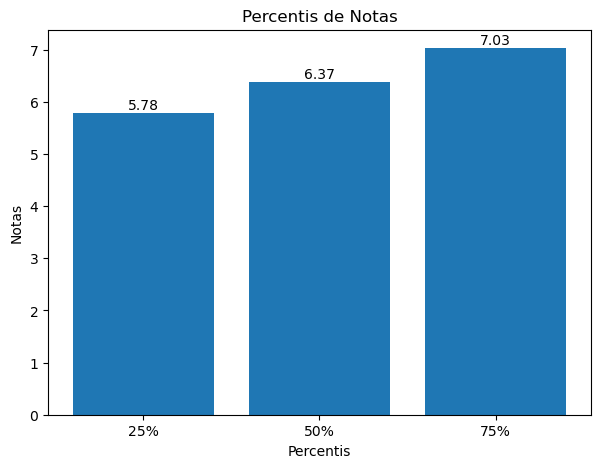

In [13]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%'], percentis.values)
titulo = plt.title('Percentis de Notas')
plt.xlabel('Percentis')
plt.ylabel('Notas')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>25% de todos os animes possuem uma nota <b>inferior a 5.78</b>.</li>
    <li>A nota 6.37 representa a mediana de notas.</li>
    <li>75% de todos os animes possuem uma nota <b>inferior a 7.03</b>.</li>
</ul>

In [14]:
# Calcula os percentis da coluna members
percentis = df_limpo['members'].quantile([0.25, 0.5, 0.75, 0.95])

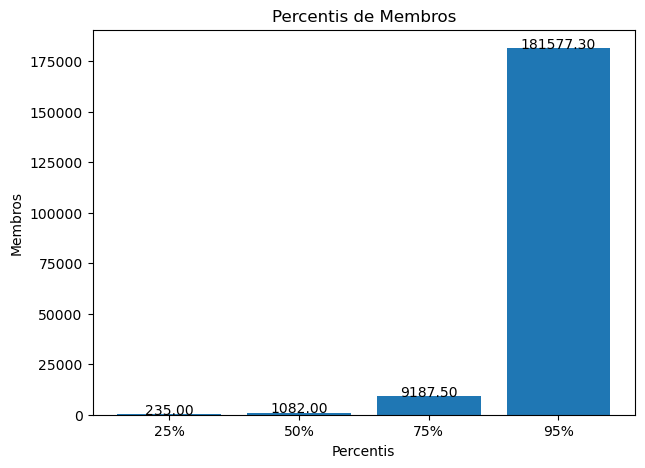

In [15]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%', '95%'], percentis.values)
titulo = plt.title('Percentis de Membros')
plt.xlabel('Percentis')
plt.ylabel('Membros')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        25% dos animes possuem quantidade de membros <b>inferior a 235 membros</b>.
    </li>
    <li>
        1082 é a mediana de membros.
    </li>
    <li>
        75% dos animes possuem menos que 9187 membros. Aproximadamente apenas <b>35%</b> dos animes possuem membros <b>acima de 10 mil membros</b>.
    </li>
    <li>
        Apenas 5% dos animes possuem uma quantidade de membros <b>maior que 181.577</b>.
    </li>
    <li>
        A mediana distante do percentil 0.75 e extremamente longe do percentil 0.95 indica que a maior parte esmagadora dos animes é pouco popular (poucos membros).
    </li>
</ul>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Distribuições
</h4>

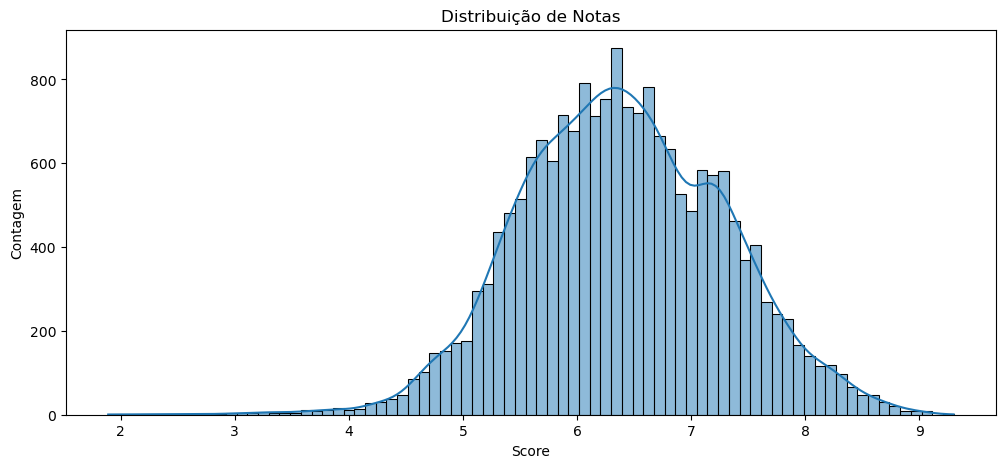

In [16]:
# Distribuições de Scores (notas dos animes)
plt.figure(figsize= (12, 5))
sns.histplot(df_limpo['score'], kde = True)
titulo = plt.title('Distribuição de Notas')
plt.xlabel('Score')
plt.ylabel('Contagem')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Percebemos que o pico da distribuição está na <b>região dos 6.5</b>, indicando que existem com notas 6.5 do que o restante.
    </li>
    <li>
        Pouquissímos animes possuem notas <b>abaixo de 4,5</b>. Animes muito ruins são bem menos avaliados comparado a animes muito bons.
    </li>
</ul>

<p>
    Vamos verificar a distribuição de notas por gênero.
</p>

In [17]:
df_exp = df_limpo.explode('genres').reset_index(drop=True)

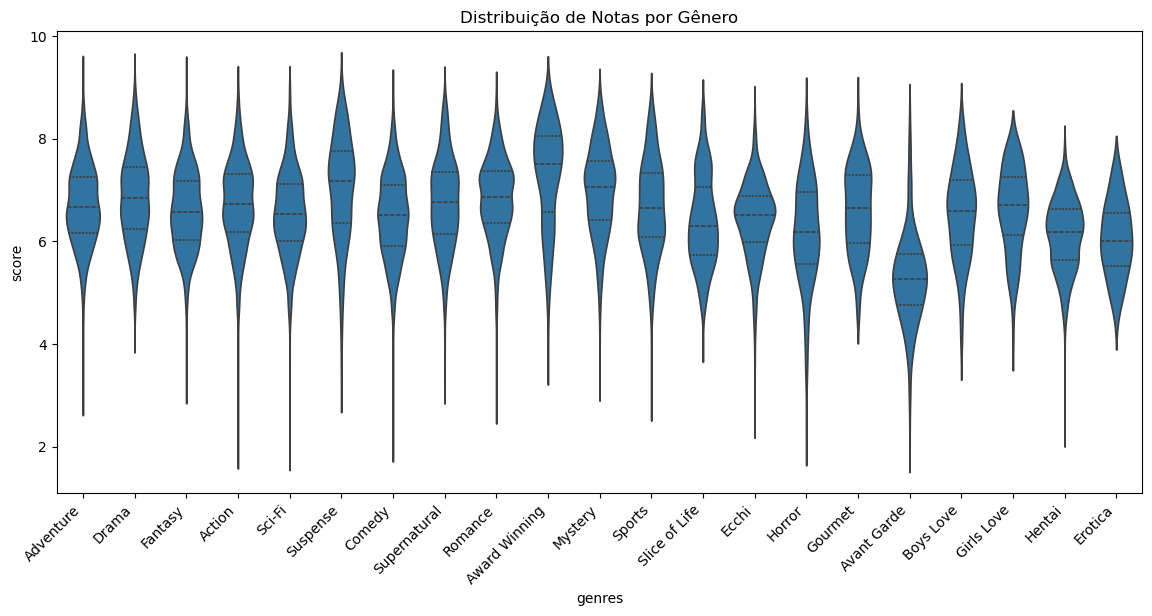

In [18]:
plt.figure(figsize=(14,6))
titulo = plt.title('Distribuição de Notas por Gênero')
sns.violinplot(data=df_exp, x='genres', y='score', inner='quartile')
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        O violino do gênero erotica apresenta um corpo estreito e esticado, indicando que as notas dos animes deste gênero são muito variádas entre abaixo de 7,5 e 3.
    </li>
    <li>
        O gênero Award Winning (animes com premiação) são mais largos em notas maiores (região dos 8 e 8.5), fazendo jus ao nome do gênero.
    </li>
    <li>
        Gênero ação e comédia são os gêneros com maiores variações de notas, tanto pra cima quanto pra baixo.
    </li>
</ul>

<p>
    Vamos utilizar a coluna categórica sobre as quantidades de avaliações que os animes receberam que criamos para construir um gráfico countplot.
</p>

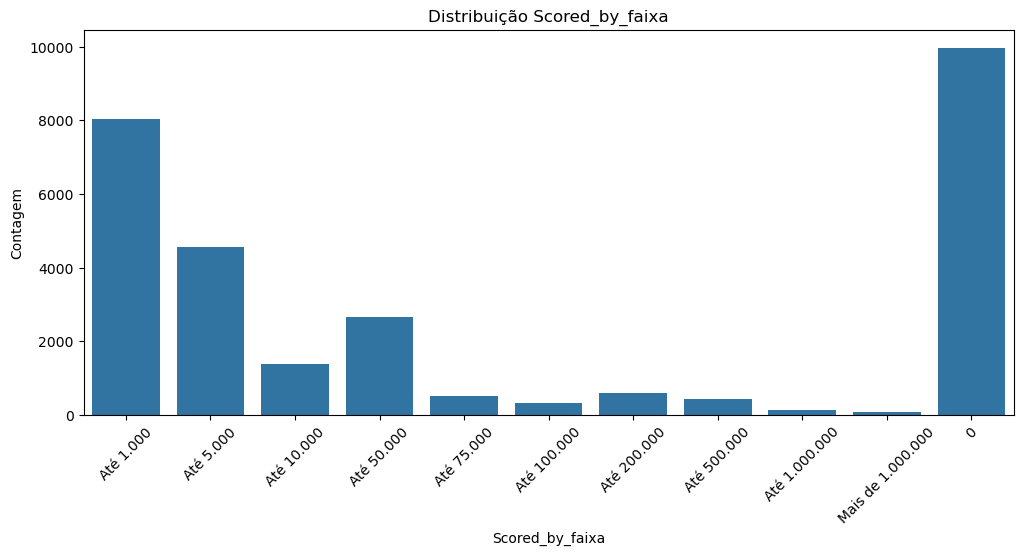

In [19]:
plt.figure(figsize=(12, 5))
sns.countplot(x='scored_by_faixa', data=df_limpo, order=df_limpo['scored_by_faixa'].cat.categories)
titulo = plt.title('Distribuição Scored_by_faixa')
plt.xlabel('Scored_by_faixa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos notar que cerca de <b>10 mil animes não possuem</b> qualquer tipo de avaliação dos usuários.
    </li>
    <li>
        A maioria dos animes possuem notas foram calculadas <b>com até 1.000 avaliações</b> de usuários. Isso indica que a maioria das notas dos animes da plataforma são notas fruto de poucas avaliações.
    </li>
    <li>
        São poucas pessoas que fazem questão de assistir e dar nota dentro da plataforma para todo anime que assiste.
    </li>
</ul>

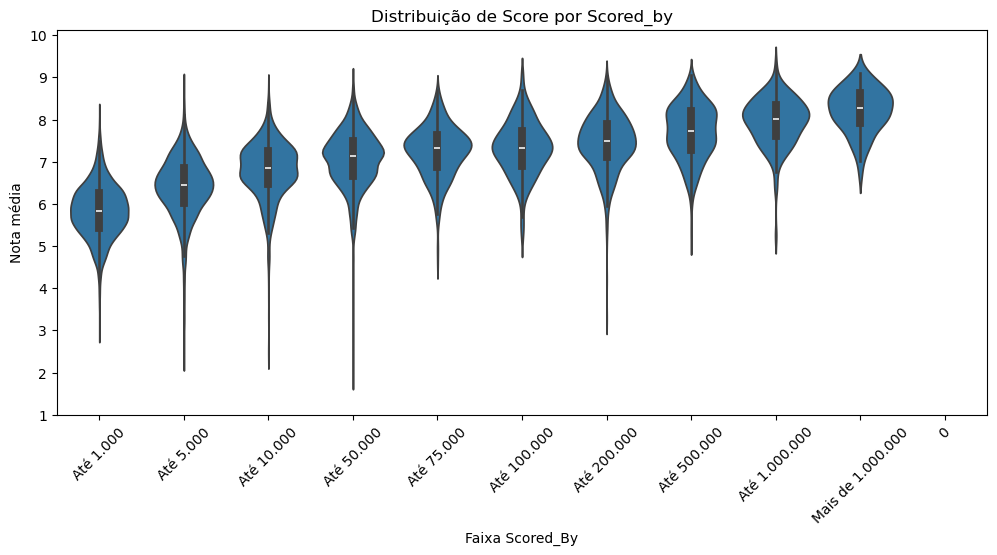

In [20]:
plt.figure(figsize=(12, 5))
sns.violinplot(
    x='scored_by_faixa', 
    y='score', 
    data=df_limpo, 
    order=df_limpo['scored_by_faixa'].cat.categories
)
plt.xticks(rotation=45)
titulo = plt.title('Distribuição de Score por Scored_by')
plt.xlabel('Faixa Scored_By')
plt.ylabel('Nota média')
plt.yticks(np.arange(1, 11, 1))
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos identificar que os animes que são avaliados por <b>muita</b> gente (mais de 1 milhão de usuários) tendem a serem bem avaliados se comparado com o restante.
    </li>
    <li>
        Animes que foram avaliados por <b>mais de 500 mil pessoas</b> tem em sua maioria tem <b>nota 8 e 8,5</b>. 
    </li>
    <li>
        Podemos identificar os violinos das faixas <i>Até 1.000.000</i> e <i>Mais de 1.000.000</i> mais altos e largos em notas altas.
    </li>
    <li>
         Animes poucos conhecidos, que possuem poucas avaliações, geralmente tem nota 6.
    </li>
</ul>

<p>
    Para as colunas que representam estúdio, tema e gêneros iremos calcular a frequência com que aparecem no dataset.
</p>

<p>
    Começando pela coluna de estúdios:
</p>

In [21]:
# Calcula a frequência dos valores da coluna studios
frequencia_studios = Counter([studio for s in df_limpo['studios'] for studio in s])

In [22]:
# Cria um dataframe para armazenar o resultado
df_frequencia_studios = pd.DataFrame.from_dict(frequencia_studios, orient='index', columns=['frequencia'])

In [23]:
# Ordena pelo estudio mais frequente
df_frequencia_studios = df_frequencia_studios.sort_values(by='frequencia', ascending=False)

In [24]:
# Renomeia as colunas
df_frequencia_studios.reset_index(inplace=True)
df_frequencia_studios.rename(columns={'index':'estudio'}, inplace=True)

In [25]:
df_frequencia_studios.shape

(1269, 2)

<p>
    Foram encontrados <b>1.269 estúdios</b> únicos dentro dos registros.
</p>

In [26]:
df_frequencia_studios.head()

,estudio,frequencia
0,Toei Animation,915
1,Sunrise,580
2,J.C.Staff,440
3,TMS Entertainment,396
4,Madhouse,380


<p>
    O estúdio <b>Toei Animation</b> é o que mais possui animes produzidos com folga tendo 915 animes.
</p>

<p>
    Para visualizar melhor esta informação irei criar faixas de quantidade de animes produzidas.
</p>

In [27]:
# Criando faixas baseada na quantidade de animes que cada estúdio pode ter
bins = [0, 1, 5, 10, 50, 100, np.inf]
labels = ['1', 'Até 5', 'Até 10', 'Até 50', 'Até 100', 'Mais de 100']

In [28]:
# Criando uma nova coluna com base nas faixas
df_frequencia_studios['freq_faixas'] = pd.cut(df_frequencia_studios['frequencia'], bins=bins, labels=labels, right=True, include_lowest=True)

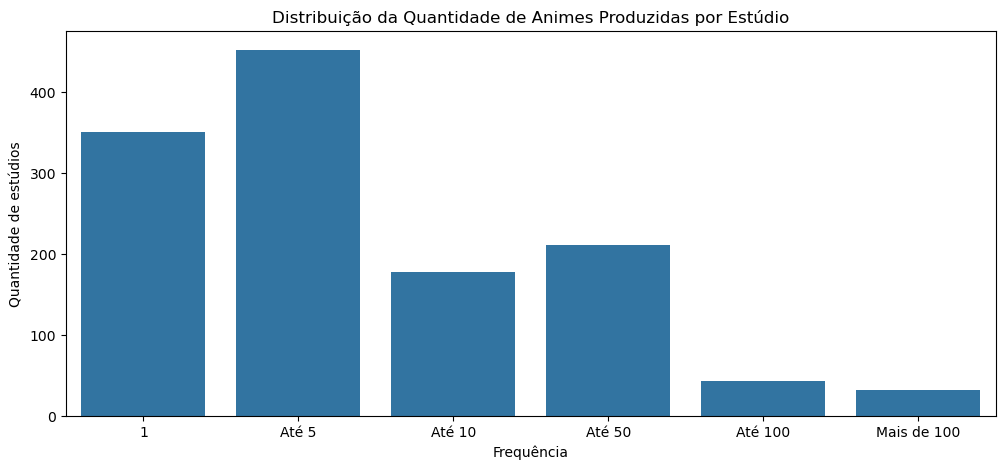

In [29]:
plt.figure(figsize=(12, 5))
sns.countplot(x='freq_faixas', data=df_frequencia_studios, order=df_frequencia_studios['freq_faixas'].cat.categories)
titulo = plt.title('Distribuição da Quantidade de Animes Produzidas por Estúdio')
plt.xlabel('Frequência')
plt.ylabel('Quantidade de estúdios')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos constatar que a maioria dos estúdios possuem entre <b>1 a 5 animes produzidos</b>.
    </li>
    <li>
        O número de estúdios que possuem entre 5 até 10 animes produzidos aparenta ser apenas a metade da quantidade de estúdios que produziram apenas 1 único anime.
    </li>
</ul>

In [30]:
# Salvando o dataframe
df_frequencia_studios.to_parquet("../data/processed/df_frequencia_studios.parquet")

<p>
    Agora a coluna referente aos temas:
</p>

In [31]:
# Calcula a frequência dos valores da coluna themes
frequencia_themes = Counter([theme for t in df_limpo['themes'] for theme in t])

In [32]:
# Cria um dataframe para armazenar o resultado
df_frequencia_themes = pd.DataFrame.from_dict(frequencia_themes, orient='index', columns=['frequencia'])

In [33]:
# Ordena pelo mais frequente
df_frequencia_themes = df_frequencia_themes.sort_values(by='frequencia', ascending=False)

In [34]:
# Renomeia as colunas
df_frequencia_themes.reset_index(inplace=True)
df_frequencia_themes.rename(columns={'index':'tema'}, inplace=True)

In [35]:
df_frequencia_themes.shape

(52, 2)

<p>
    Foram encontrados <b>52 temas</b> diferentes.
</p>

In [36]:
# Retorna os 5 temas mais frequentes
df_frequencia_themes.head()

,tema,frequencia
0,Music,5027
1,School,2218
2,Historical,1708
3,Mecha,1309
4,Anthropomorphic,1205


<p>
    Vamos imprimir todos os temas existentes e suas respectivas quantidades de animes.
</p>

In [37]:
# Imprime todos os temas e a quantidade de animes que possui (frequencia) em ordem decrescente
df_frequencia_themes.style.bar(subset=['frequencia'], color='lightblue').hide(axis='index')

tema,frequencia
Music,5027
School,2218
Historical,1708
Mecha,1309
Anthropomorphic,1205
Parody,800
Military,738
Super Power,717
Adult Cast,704
Martial Arts,701


<p>
    Praticamente metade dos temas existentes possuem menos de 200 animes, enquanto o mais popular têm mais de 5000. Isso mostra uma <b>disparidade muito grande</b> na relação de temas x quantidade de animes.
</p>

<p>
    O boxplot ajuda a verificar essa disparidade entre os dados.
</p>

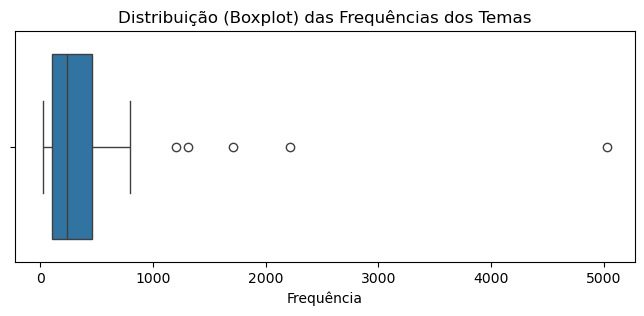

In [38]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df_frequencia_themes, x="frequencia")
plt.title("Distribuição (Boxplot) das Frequências dos Temas")
plt.xlabel("Frequência")
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A distribuição de Temas é <b>extremamente assimétrica</b>, indicando que temos <b>muitíssimos</b> animes dos mesmos temas. 
    </li>
    <li>
        A mediana da quantidade de animes por tema está entre 200-300 animes.
    </li>
    <li>
        Os pontos nos gráficos representam <b>outliers</b> e suas distâncias entre a mediana mostram o quão <b>mais frequentes</b> são aqueles temas do restante. Neste caso são os temas Music, School, Mecha e Anthropomorphic.  
    </li>
</ul>

In [39]:
# Salvando o dataframe
df_frequencia_themes.to_parquet("../data/processed/df_frequencia_themes.parquet")

<p>
    Agora para a coluna referente a gêneros:
</p>

In [40]:
# Calcula a frequência dos valores da coluna genres
frequencia_genres = Counter([genre for g in df_limpo['genres'] for genre in g])

In [41]:
# Cria um dataframe para armazenar o resultado
df_frequencia_genres = pd.DataFrame.from_dict(frequencia_genres, orient='index', columns=['frequencia'])

In [42]:
# Ordena pelo mais frequente
df_frequencia_genres = df_frequencia_genres.sort_values(by='frequencia', ascending=False)

In [43]:
# Renomeia as colunas
df_frequencia_genres.reset_index(inplace=True)
df_frequencia_genres.rename(columns={'index':'genero'}, inplace=True)

In [44]:
df_frequencia_genres.shape

(21, 2)

<p>
    Foram identificados <b>21 gêneros</b> de anime diferentes.
</p>

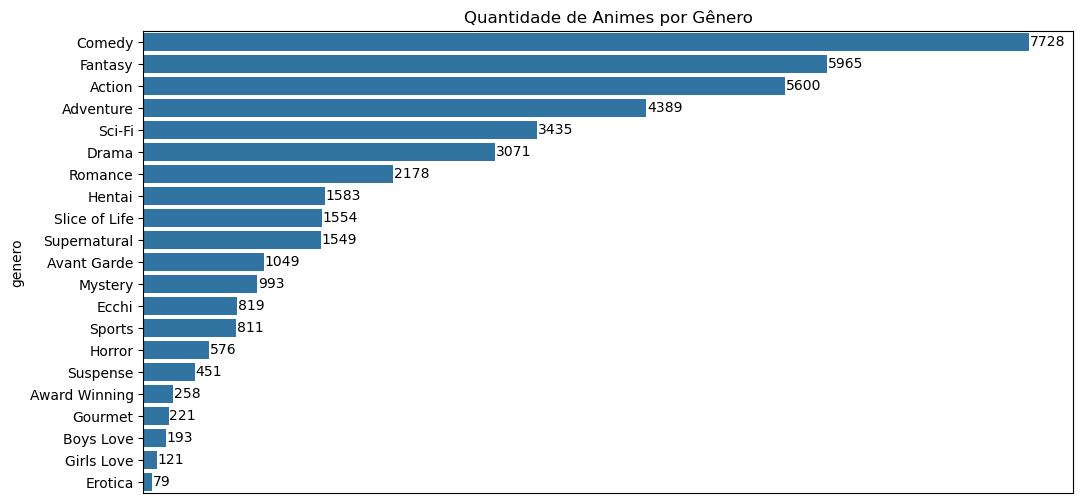

In [45]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=df_frequencia_genres, x='frequencia', y='genero')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
titulo = plt.title('Quantidade de Animes por Gênero')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Animes de comédia são mais comuns em todo o catálogo.
    </li>
    <li>
        Os 3 gêneros mais comuns são Comédia, Fantasia, Ação, enquanto os 3 gêneros menos comuns são Boys Love, Girls Love e Erotica.
    </li>
</ul>

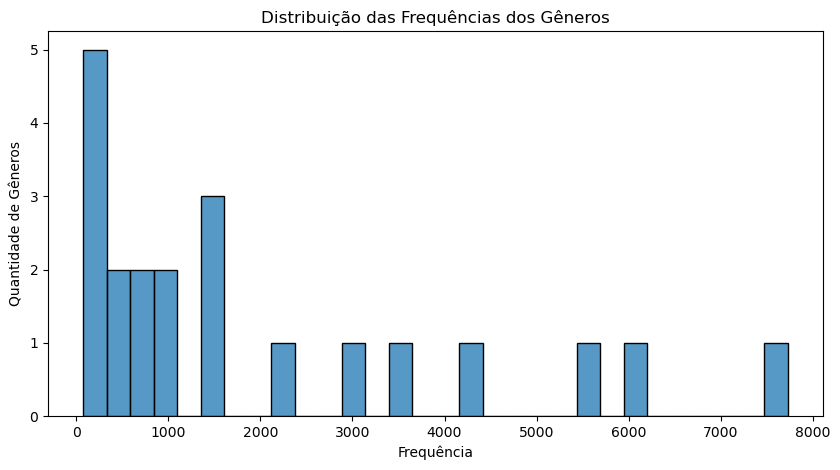

In [46]:
plt.figure(figsize=(10,5))
sns.histplot(data=df_frequencia_genres, x="frequencia", bins=30)
plt.title("Distribuição das Frequências dos Gêneros")
plt.xlabel("Frequência")
plt.ylabel("Quantidade de Gêneros")
plt.show()

<p>
    O histograma mostra como tem <b>muitos gêneros com pouca frequência</b> enquanto há <b>poucos gêneros com frequências altissímas</b>.  
</p>

In [47]:
# Calcula os percentis da frequência de gêneros
percentis = df_frequencia_genres['frequencia'].quantile([0.25, 0.5, 0.75])

In [48]:
percentis

0.25     451.0
0.50    1049.0
0.75    3071.0
Name: frequencia, dtype: float64

<ul>
    <li>
       25% dos gêneros possuem <b>menos de 451 animes</b>.
    </li>
    <li>
        A mediana é 1049. Metade dos gêneros possuem menos de 1049 animes e a outra mentade mais de 1049 animes.
    </li>
    <li>
        75% dos gêneros possuem <b>menos de 3071 animes</b>.
    </li>
</ul>

In [49]:
# Salvando o dataframe
df_frequencia_genres.to_parquet("../data/processed/df_frequencia_genres.parquet")

<p>
    Vamos analisar a coluna de demografia.
</p>

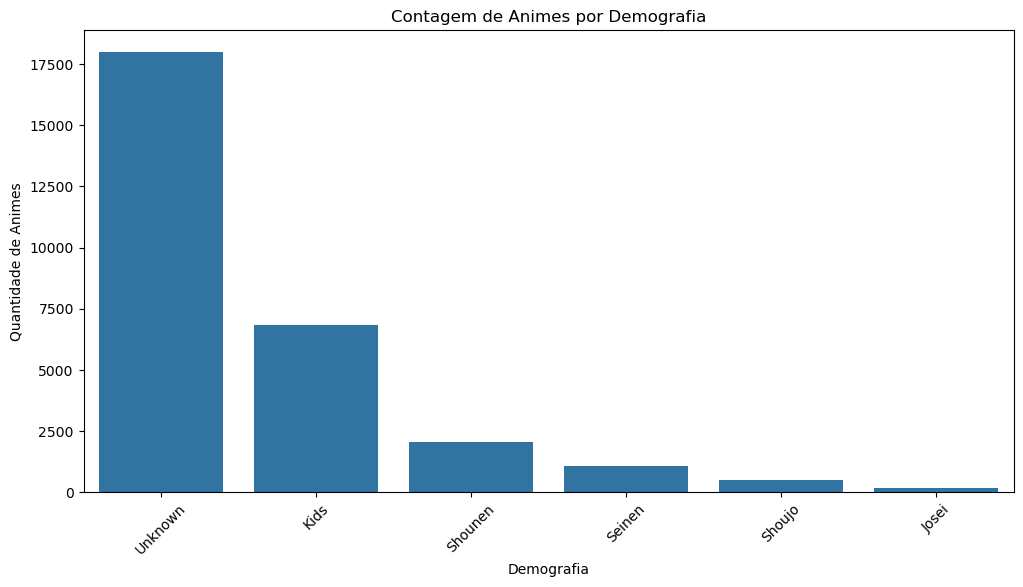

In [50]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_limpo, x='demographic', order=df_limpo['demographic'].value_counts().index)
titulo = plt.title('Contagem de Animes por Demografia')
plt.xticks(rotation=45)
plt.xlabel('Demografia')
plt.ylabel('Quantidade de Animes')
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Podemos constar que na grande maioria dos registros não possui uma demografia informada. E a demografia que mais aparece na plataforma excluindo os valores desconhecidos é a demografia infantil.
    </li>
</ul>

In [51]:
# Ignora os registros que tiverem demografia como Unknown
freq_demografias = df_limpo['demographic'].value_counts().drop('Unknown')

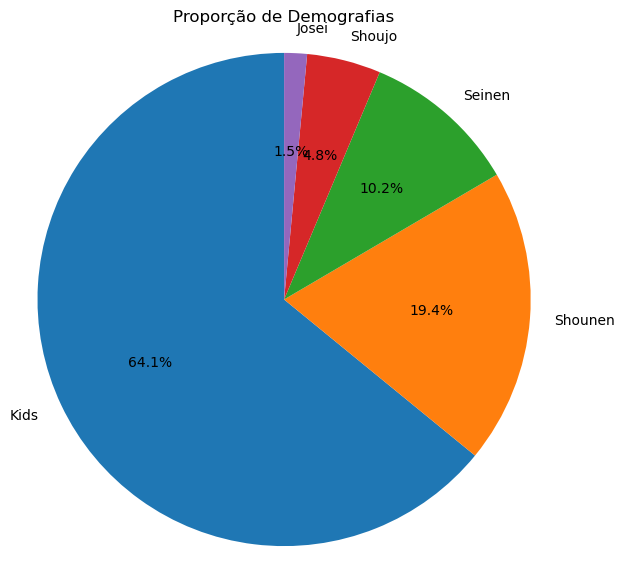

In [52]:
plt.figure(figsize=(7,7))
plt.pie(freq_demografias.values, labels=freq_demografias.index, autopct='%1.1f%%', startangle=90)
plt.title('Proporção de Demografias')
plt.axis('equal')
# Para salvar o gráfico
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Ignorando as demografias desconhecidas, a <b>demografia infantil é mais presente</b> nos registros, representando mais de 50% dos animes.
    </li>
    <li>
        A demografia josei é a menos presente.
    </li>
</ul>

<p>
    Vamos verificar a distribuição dos animes por <b>material de origem</b>.
</p>

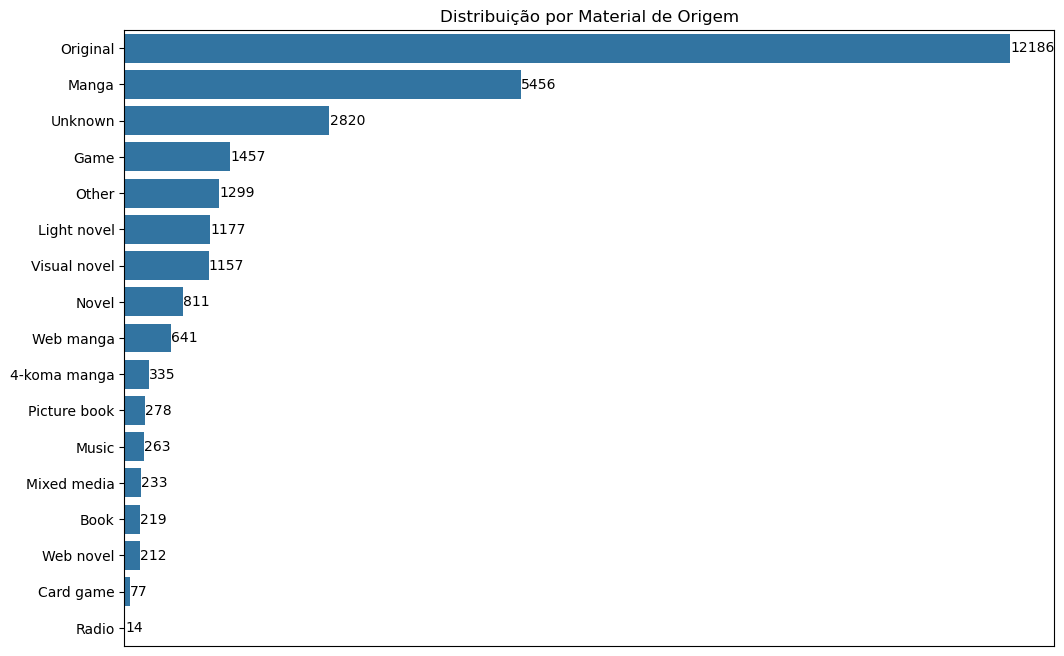

In [53]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=df_limpo, y='source', order=df_limpo['source'].value_counts().index)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
titulo = plt.title('Distribuição por Material de Origem')
plt.xlabel('Material de Origem')
plt.ylabel('')
ax.xaxis.set_visible(False)
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        Em sua grande maioria temos bem mais animes originais do que adaptações de mangá.
    </li>
    <li>
        Temos mais animes de games do que light novels
    </li>
</ul>

<p>
    Vamos verificar a distribuição por <b>tipo de adaptação</b> (se é televisiva ou filme por exemplo).
</p>

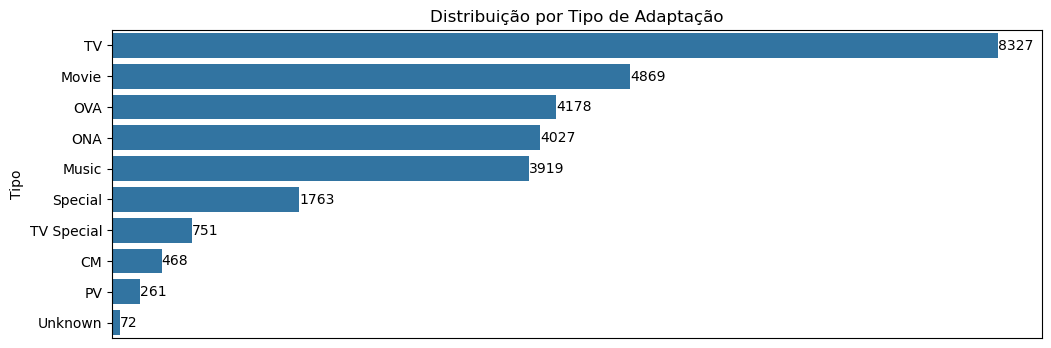

In [54]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(data=df_limpo, y='item_type', order=df_limpo['item_type'].value_counts().index)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
titulo = plt.title('Distribuição por Tipo de Adaptação')
plt.ylabel('Tipo')
ax.xaxis.set_visible(False)
# Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
       Temos registrados 8327 animes no formato seriado televisivo e 4869 animes em filmes.
    </li>
    <li>
        Distribuição bem assimétrica, mas esperada.
    </li>
</ul>

<p>
    Vamos verificar o resumo estatístico da quantidade de episódios dos animes (do tipo TV)
</p>

In [55]:
df_limpo[df_limpo['item_type'] == 'TV']['episodes'].describe()

count    8032.000000
mean       38.095369
std        80.004875
min         1.000000
25%        12.000000
50%        25.000000
75%        48.000000
max      3057.000000
Name: episodes, dtype: float64

<ul>
    <li>
        Somando todos os episódios de todos seriados temos mais de 8000 episódios.
    </li>
    <li>
        A média é de 38 episódios.
    </li>
    <li>
        Existe animes que possuem apenas 1 episódio (mesmo sendo seriado). E a maior quantidade de episódios para um anime encontrado foi de 3057 episódios.
    </li>
    <li>
        A metade de todos os animes seriados possuem menos de 25 episódios.
    </li>
    <li>
        75% dos animes seriados tem menos de 48 episódios.
    </li>
</ul>

<p>
    Vamos verificar a <b>correlação entre a variável score (nota) e scored_by (quantida de pessoas que deram nota)</b>.
</p>
<ul>
    <li>
        Quanto mais próximo de 1, mais forte é a correlação positiva 
    </li>
    <li>
        Quanto mais próximo de -1, mais forte é a correlação negativa
    </li>
    <li>
        Próximo de 0 indica pouca ou nenhuma correlação
    </li>
</ul>
<p>
    Vamos calcular a matriz de correlação e depois visualizá-la em um mapa de calor:
</p>

In [56]:
# Cria a matriz de correlação
corr_matrix = df_limpo[['score', 'scored_by', 'members']].corr()

In [57]:
# Visualiza
corr_matrix

,score,scored_by,members
score,1.000000,0.347490,0.386699
scored_by,0.347490,1.000000,0.989199
members,0.386699,0.989199,1.000000


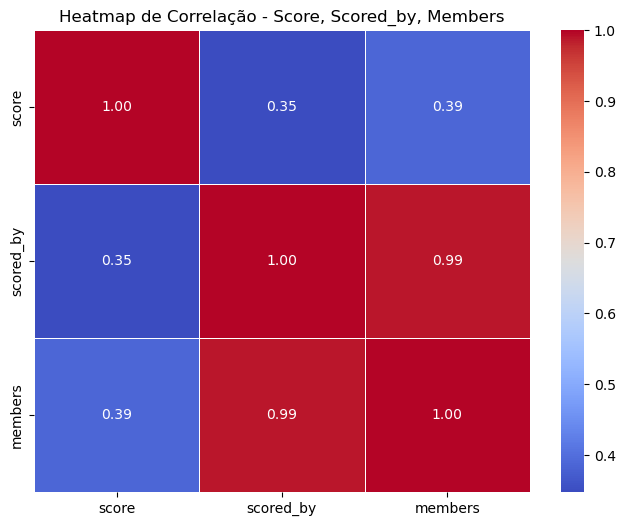

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
titulo = plt.title("Heatmap de Correlação - Score, Scored_by, Members")
#Para salvar os gráficos
#plt.savefig(f"../graphs/analise_exploratoria/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

<ul>
    <li>
        A relação entre <b>nota</b> e <b>membros</b> é <b>positiva fraca</b> indicando que animes com mais membros tendem <b>levemente a ter notas melhores</b>.
    </li>
    <li>
        A relação entre <b>nota</b> e a <b>quantidade de avaliações</b> (scored_by) também é <b>positiva fraca</b>, indicando que quanto mais avaliações um anime tem, levemente <b>maior será a nota</b>. 
    </li>
    <li>
        A relação entre a <b>quantidade de avaliações</b> (scored_by) e <b>quantidade de membros</b> é <b>quase perfeita</b> (muito próxima de 1.0), indicando que todo anime que as pessoas adicionam à suas listas (watching, on hold, completed, droped, plan to watch) <b>são sempre depois avaliados com uma nota</b>.
    </li>
</ul>

<h4 style="color:blue;text-shadow: 2px 2px #E0E0E0">
    Fim
</h4>

<p>
    Salvando o dataframe para ser utilizado no notebook seguindo.
</p>

In [59]:
# Salvando variáveis
%store df_limpo

Stored 'df_limpo' (DataFrame)


In [60]:
%watermark -a "Gregory280"

Author: Gregory280



In [61]:
%watermark --iversions

pandas    : 2.2.3
sklearn   : 1.6.1
matplotlib: 3.10.0
missingno : 0.5.2
seaborn   : 0.13.2
numpy     : 2.1.3

